/tmp/ipykernel_101/4014264585.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = wb.download(indicator='NY.GDP.MKTP.CD', country=['AM', '1W'], start=1990, end=date.today().year, errors='ignore')


2023-01-01    0.000228
2024-01-01    0.000229
2025-01-01    0.000230
2026-01-01    0.000226
2027-01-01    0.000228
2028-01-01    0.000232
2029-01-01    0.000238
dtype: float64
2023-01-01    0.000230
2024-01-01    0.000231
2025-01-01    0.000232
2026-01-01    0.000228
2027-01-01    0.000229
2028-01-01    0.000234
2029-01-01    0.000240
dtype: float64
            NY.GDP.MKTP.CD
year                      
2023-01-01        0.000230
2022-01-01        0.000193
2021-01-01        0.000142
2020-01-01        0.000148
2019-01-01        0.000155
2018-01-01        0.000144
2017-01-01        0.000141
2016-01-01        0.000138
2015-01-01        0.000140
2014-01-01        0.000145
2013-01-01        0.000143
2012-01-01        0.000140
2011-01-01        0.000137
2010-01-01        0.000139
2009-01-01        0.000142
2008-01-01        0.000182
2007-01-01        0.000158
2006-01-01        0.000123
2005-01-01        0.000103
2004-01-01        0.000081
2003-01-01        0.000072
2002-01-01        0.000068


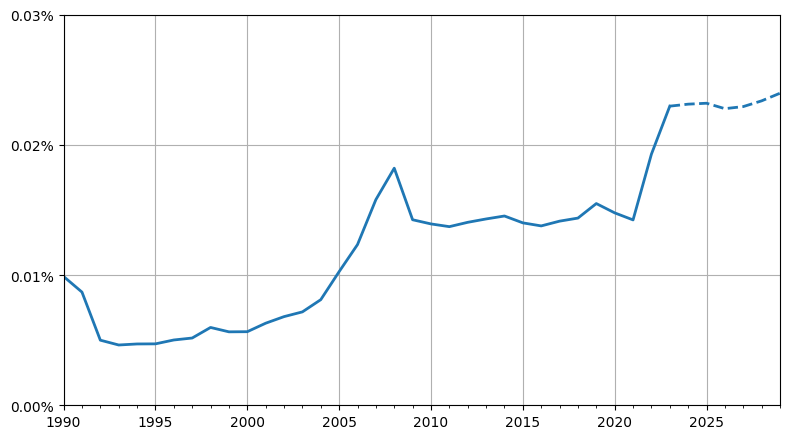

In [9]:
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from pandas_datareader import wb
from datetime import date

data = wb.download(indicator='NY.GDP.MKTP.CD', country=['AM', '1W'], start=1990, end=date.today().year, errors='ignore')
ratio = data.loc['Armenia'] / data.loc['World']
ratio = ratio.dropna()
ratio.index = pd.to_datetime(ratio.index)

# now get IMF data based on https://www.imf.org/en/Publications/WEO/weo-database/2024/October
# By Countries -> Middle East and Central Asia -> Armenia -> Gross domestic product, current prices U.S. DOLLARS -> prepare report
imf_data = pd.Series({
    '2023-01-01': 24.086 / 105685.121,
    '2024-01-01': 25.251 / 110064.915,
    '2025-01-01': 26.578 / 115494.312,
    '2026-01-01': 27.418 / 121325.453,
    '2027-01-01': 28.941 / 127172.936,
    '2028-01-01': 30.929 / 133351.770,
    '2029-01-01': 33.203 / 139651.617
})
imf_data.index = pd.to_datetime(imf_data.index)
print(imf_data)
# now align with WB data
imf_data2 = imf_data * ratio.iloc[0, 0] / imf_data.iloc[0]
print(imf_data2)
print(ratio)

fig, ax = plt.subplots(figsize=(16/2, 9/2))

ratio.dropna().plot(ax=ax, legend=0, grid=1, lw=2);
imf_data2.plot(ax=ax, style='--', color='C0', grid=1, lw=2);
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=2))
ax.set_ylim(bottom = 0, top=0.0003);
ax.set_yticks([0, 0.0001, 0.0002, 0.0003]);
ax.xaxis.set_label_text("")
plt.tight_layout()
plt.savefig('հնա.svg')